# Check noise levels of the maps and get foorprints

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np, glob, healpy as H, os, sys
from pylab import *

import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.ERROR)

In [3]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'
rcParams['font.family'] = 'serif'

In [8]:
sim_fd = 'data/simulations/phase3/noise_depth/'
total_years = 10
band_arr = [20, 30, 40, 90, 150, 220, 280]
baseline_band = 150
depth_map_pref = 'lat_surveyval_fbandval_yearvalyears_depth.fits'
survey_dic = {
             'lat_wide': ['wide_supplement', r'LAT-Wide'],
             'lat_roman': ['roman_supplement', r'LAT-Roman'], 
             'lat_delensing': ['delensing_sun90bk', r'LAT-Delensing'], 
             }
vmin_vmax_dic = {'lat_roman': [0.5, 5.], 
                 'lat_delensing': [0.5, 5.], 
                 'lat_wide': [1.5, 8.], 
                }

use_absolute_or_relative_noise_thresholds = 'absolute'

#Planck gal mask stuff
survey_arr_with_gal_contamination = ['lat_wide']
planck_gal_mask_fname = 'data/HFI_Mask_GalPlane-apo0_2048_R2.00.fits'
which_gal_frac_ind_dic = {'GAL070': 3, 'GAL080': 4, 'GAL090': 5}
smoothing_beam = 2.

#results
op_fd = 'results/'
noise_val_dic_fname = '%s/cmbs4_chile_opt_survey_patch_noise_levels.npy' %(op_fd)



lat_wide
Patch = 1
	Noise thresholds [uK-arcmin] = (0.01, 2)
	Mean noise value = 1.77412 uK-arcmin
	fsky = 0.0810452 (3343 sq. deg)
Patch = 2
	Noise thresholds [uK-arcmin] = (2, 5)
	Mean noise value = 2.8917 uK-arcmin
	fsky = 0.341027 (14068 sq. deg)
Patch = 3
	Noise thresholds [uK-arcmin] = (5, 8)
	Mean noise value = 6.22067 uK-arcmin
	fsky = 0.0169312 (698 sq. deg)
Patch = 4
	Noise thresholds [uK-arcmin] = (8, 10000)
	Mean noise value = 29.3685 uK-arcmin
	fsky = 0.0286102 (1180 sq. deg)
Total fsky = 0.467613 (19290 sq. deg)

All band noise levels for lat_wide
Patch = 1: 41.3, 21.1, 11.4, 1.9, 1.8, 6.8, 19.9 uK-arcmin
Patch = 2: 67.7, 34.2, 18.5, 3.1, 2.9, 11.3, 33.1 uK-arcmin
Patch = 3: 151.2, 74.3, 40.3, 6.6, 6.2, 26.9, 78.9 uK-arcmin
Patch = 4: 205.8, 183.8, 100.0, 31.1, 29.4, 44.9, 132.0 uK-arcmin


<Figure size 900x600 with 0 Axes>

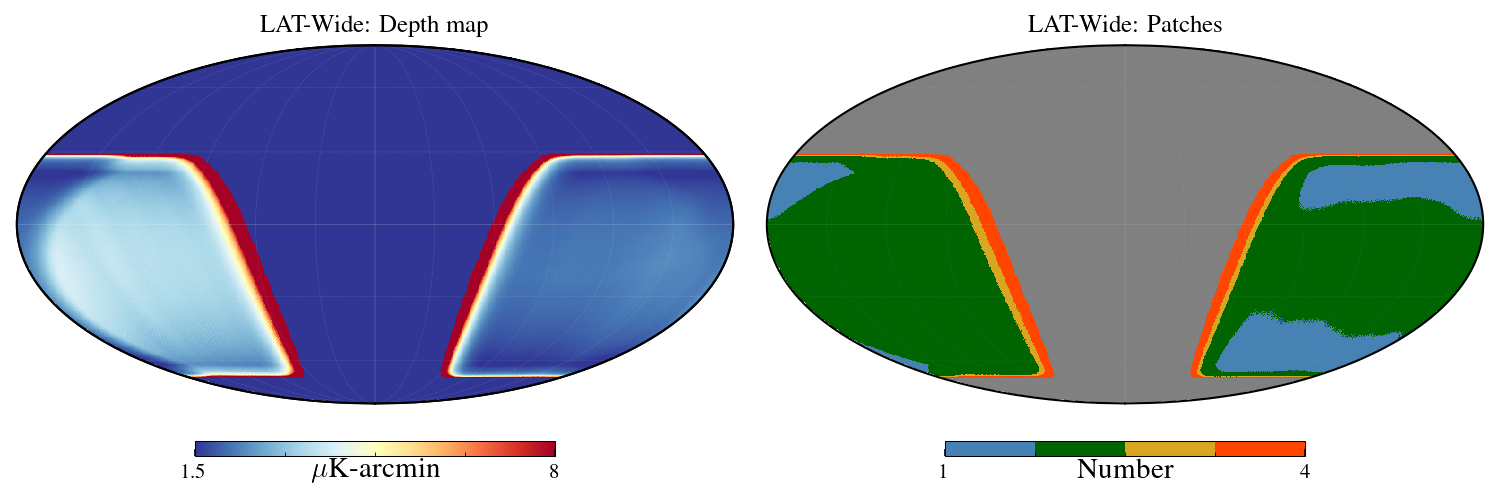

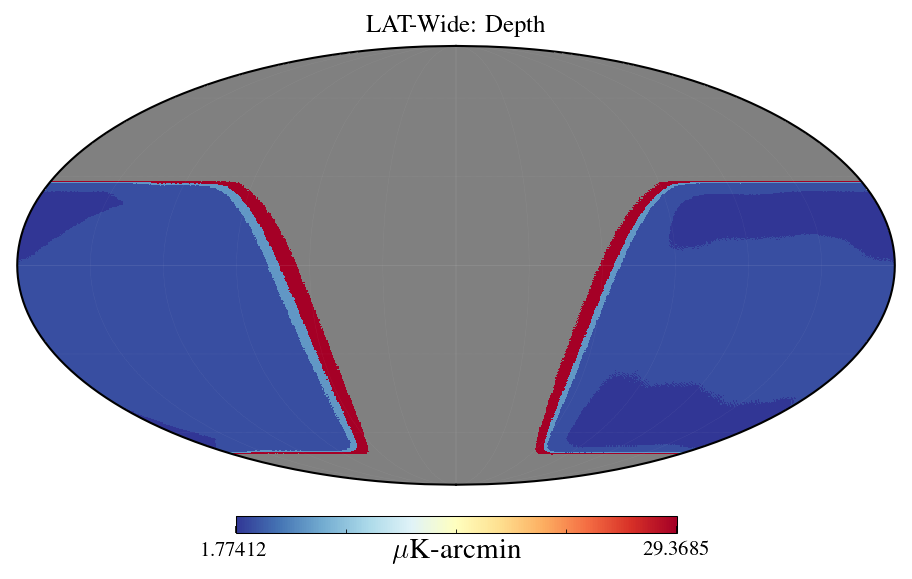

------------------------------


lat_roman
Patch = 1
	Noise thresholds [uK-arcmin] = (0.01, 1)
	Mean noise value = 0.669452 uK-arcmin
	fsky = 0.0481415 (1985 sq. deg)
Patch = 2
	Noise thresholds [uK-arcmin] = (1, 2.5)
	Mean noise value = 1.52019 uK-arcmin
	fsky = 0.0194782 (803 sq. deg)
Patch = 3
	Noise thresholds [uK-arcmin] = (2.5, 5)
	Mean noise value = 3.51918 uK-arcmin
	fsky = 0.00693862 (286 sq. deg)
Patch = 4
	Noise thresholds [uK-arcmin] = (5, 10000)
	Mean noise value = 19.2214 uK-arcmin
	fsky = 0.0100991 (416 sq. deg)
Total fsky = 0.0846574 (3492 sq. deg)

All band noise levels for lat_roman
Patch = 1: 16.3, 8.3, 4.4, 0.7, 0.7, 2.8, 8.0 uK-arcmin
Patch = 2: 37.8, 16.7, 8.7, 1.6, 1.5, 7.0, 20.1 uK-arcmin
Patch = 3: 80.1, 36.5, 19.1, 3.8, 3.5, 12.8, 36.7 uK-arcmin
Patch = 4: 134.8, 106.1, 55.5, 20.7, 19.2, 19.3, 55.1 uK-arcmin


<Figure size 900x600 with 0 Axes>

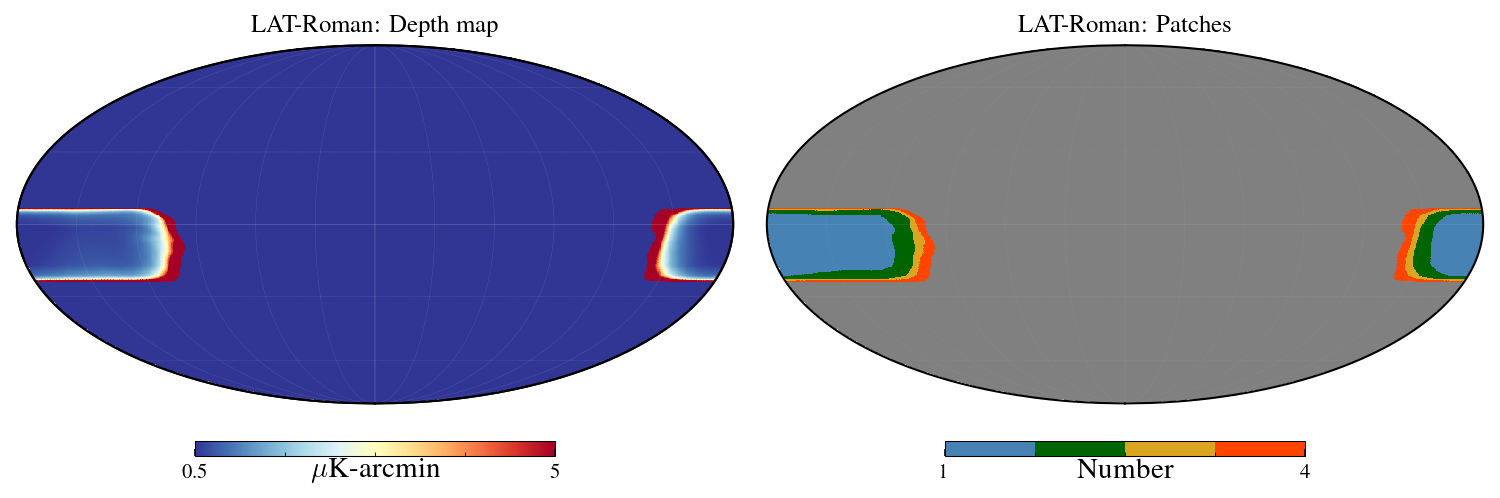

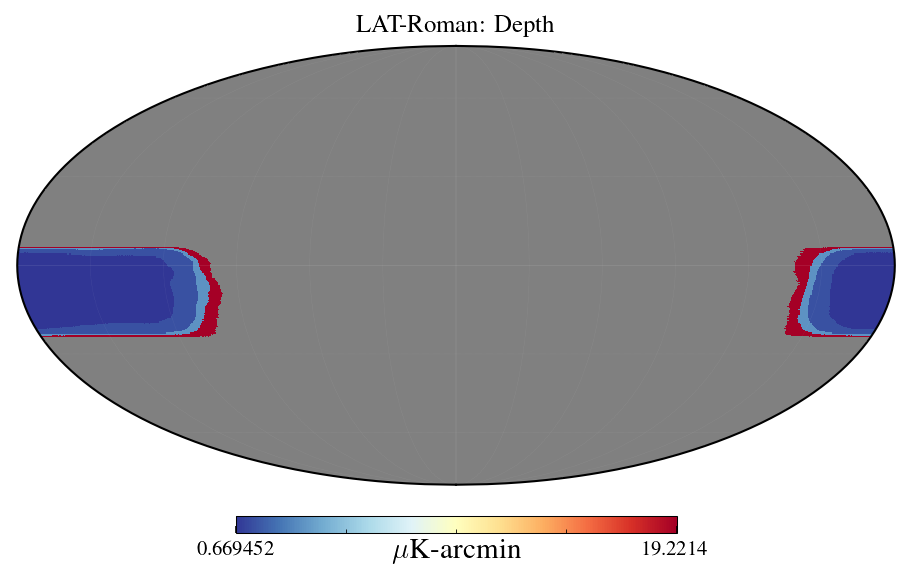

------------------------------


lat_delensing
Patch = 1
	Noise thresholds [uK-arcmin] = (0.01, 1)
	Mean noise value = 0.600043 uK-arcmin
	fsky = 0.0431302 (1779 sq. deg)
Patch = 2
	Noise thresholds [uK-arcmin] = (1, 2.5)
	Mean noise value = 1.5705 uK-arcmin
	fsky = 0.0210209 (867 sq. deg)
Patch = 3
	Noise thresholds [uK-arcmin] = (2.5, 5)
	Mean noise value = 3.53383 uK-arcmin
	fsky = 0.0103391 (426 sq. deg)
Patch = 4
	Noise thresholds [uK-arcmin] = (5, 10000)
	Mean noise value = 21.9324 uK-arcmin
	fsky = 0.0179469 (740 sq. deg)
Total fsky = 0.0924371 (3813 sq. deg)

All band noise levels for lat_delensing
Patch = 1: 14.0, 7.1, 3.8, 0.6, 0.6, 2.4, 6.9 uK-arcmin
Patch = 2: 39.0, 17.6, 9.6, 1.7, 1.6, 8.7, 25.5 uK-arcmin
Patch = 3: 67.2, 40.3, 21.9, 3.7, 3.5, 17.4, 51.2 uK-arcmin
Patch = 4: 165.6, 116.1, 63.2, 23.2, 21.9, 35.3, 104.2 uK-arcmin


<Figure size 900x600 with 0 Axes>

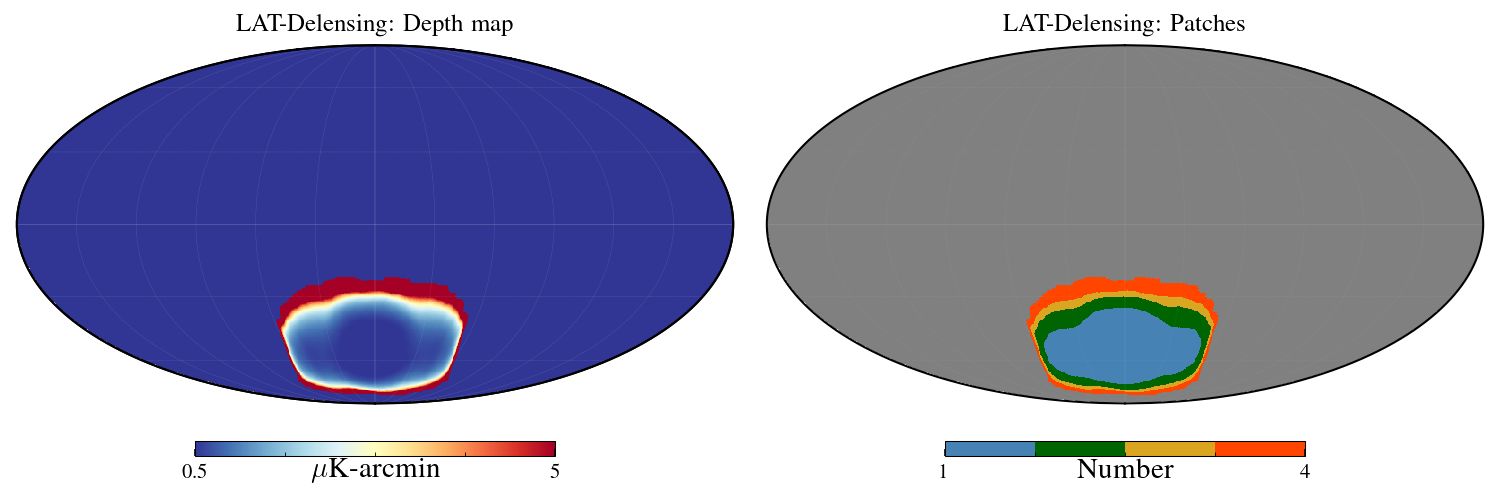

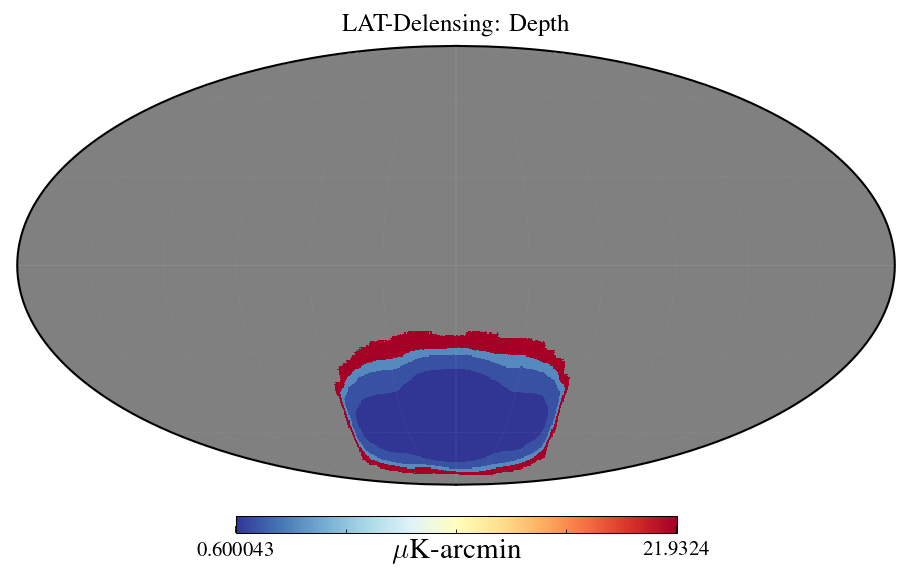

------------------------------
results//cmbs4_chile_opt_survey_patch_noise_levels.npy


In [5]:
def get_depth_maps(band_arr, survey, sim_fd, depth_map_pref, total_years):
    depth_map_dic = {}
    for band in band_arr:
        depth_map_fname = '%s/%s' %(sim_fd, depth_map_pref)
        depth_map_fname = depth_map_fname.replace('surveyval', surveyval).replace('bandval', '%03d' %(band)).replace('yearval', '%02d' %(total_years))
        depth_map = H.read_map( depth_map_fname )
        depth_map_dic[band] = depth_map
        
    return depth_map_dic

#pick the depth map
parent_patch_dic = {}
parent_noise_val_dic = {}
for survey in survey_dic:

    print('\n')
    #------------------------------
    #get the depth map file name
    surveyval, surveylabval = survey_dic[survey]
    print( survey )
    #read the depth map
    depth_map_dic = get_depth_maps(band_arr, survey, sim_fd, depth_map_pref, total_years)
    baseline_depth_map = depth_map_dic[baseline_band]
    #------------------------------
    
    #------------------------------
    #plot
    vmin, vmax = vmin_vmax_dic[survey]
    ##H.mollview(depth_map, min = vmin, max = vmax, cmap = cmap, title = r'%s' %(surveylabval)); show()
    #------------------------------
    
    #------------------------------
    #pick patches
    #mask
    npix = len(baseline_depth_map)
    hmask = np.ones( npix )
    hmask[baseline_depth_map==0] = 0.
    unmasked_inds = np.where( hmask != 0 )[0]
    masked_inds = np.where( hmask == 0 )[0]
    
    hmap_patches = np.zeros( npix )
    hmap_patches_noisemap = np.zeros( npix )
    
    if use_absolute_or_relative_noise_thresholds == 'relative':
        medval = np.median( baseline_depth_map[unmasked_inds] )
        stdval = np.std( baseline_depth_map[unmasked_inds] )
        std_threshold_arr = np.asarray( [0., 0.05, 0.1, 0.25, 0.5, 1, 1e4] )
        threshold_arr = std_threshold_arr * stdval
    elif use_absolute_or_relative_noise_thresholds == 'absolute':
        if survey == 'lat_delensing':
            threshold_arr = [0.01, 1., 2.5, vmax, 1e4]
        elif survey == 'lat_roman':
            threshold_arr = [0.01, 1., 2.5, vmax, 1e4]
        elif survey == 'lat_wide':
            threshold_arr = [0.01, 2., 5., vmax, 1e4]
            
    patch_dic = {}
    noise_val_dic = {}
    total_fsky = 0.
    for cntr, thresh1 in enumerate( threshold_arr[:-1] ):
        thresh2 = threshold_arr[cntr+1]
        
        if use_absolute_or_relative_noise_thresholds == 'relative':
            cond1 = abs(baseline_depth_map - medval) >= thresh1
            cond2 = abs(baseline_depth_map - medval) < thresh2
        elif use_absolute_or_relative_noise_thresholds == 'absolute':
            cond1 = baseline_depth_map >= thresh1
            cond2 = baseline_depth_map < thresh2
        curr_good_inds = np.where( (cond1) & (cond2) & (hmask!=0) )[0]
        noise_val_in_this_patch = np.mean( baseline_depth_map[curr_good_inds] )
        
        hmap_patches[curr_good_inds] = cntr+1
        hmap_patches_noisemap[curr_good_inds] = noise_val_in_this_patch
        
        #calcualte noise value for all bands now
        curr_patch_noise_val_in_this_patch_dic = {}
        for band in band_arr:
            curr_patch_noise_val_in_this_patch_dic[band] = np.mean( depth_map_dic[band][curr_good_inds] )
        ###print(noise_val_in_this_patch_dic); sys.exit()
        noise_val_dic[cntr] = curr_patch_noise_val_in_this_patch_dic
        
        patch_dic[cntr] = np.zeros( npix )
        patch_dic[cntr][curr_good_inds] = 1
        curr_fsky = np.mean(patch_dic[cntr]**2.)

        total_fsky += curr_fsky
        #print( thresh1, thresh2, len(curr_good_inds), noise_val_in_this_patch, curr_fsky, total_fsky )
        total_sky_area = 41253.
        print('Patch = %s' %(cntr+1))
        print('\tNoise thresholds [uK-arcmin] = (%g, %g)' %(thresh1, thresh2))
        print('\tMean noise value = %g uK-arcmin' %(noise_val_in_this_patch))
        #print('\tMean noise in all bands', noise_val_dic[cntr])
        print('\tfsky = %g (%d sq. deg)' %(curr_fsky, curr_fsky * total_sky_area))
        #print('\tTotal fsky = %g' %(total_fsky))
        ##sys.exit()
        
    print('Total fsky = %g (%d sq. deg)' %(total_fsky, total_fsky * total_sky_area))
        
    #print all band noise levels
    print('\nAll band noise levels for %s' %(survey))
    for cntr in noise_val_dic:
        to_print_str = ''
        for band in noise_val_dic[cntr]:
            to_print_str = '%s, %.1f' %(to_print_str, noise_val_dic[cntr][band])
        to_print_str = to_print_str.strip(', ')
        to_print_str = 'Patch = %s: %s uK-arcmin' %(cntr+1, to_print_str)
        print(to_print_str)
        
    parent_patch_dic[survey] = patch_dic
    #------------------------------
    #plotting stuffs below
        
    bad_inds = np.where( (hmap_patches==0.) | (hmask == 0) )
    hmap_patches[bad_inds] = H.UNSEEN
    hmap_patches_noisemap[bad_inds] = H.UNSEEN
    good_inds = np.where( (hmap_patches!=0.) & (hmask!= 0) & (hmap_patches!=H.UNSEEN) )
        
    clf()
    figure(figsize = (10., 5.))
    subplots_adjust(wspace = 0.05)
    
    vmin, vmax = vmin_vmax_dic[survey]
    cmap = cm.RdYlBu_r
    H.mollview(baseline_depth_map, 
               cmap = cmap, 
               title = r'%s: Depth map' %(surveylabval), 
               min = vmin, max = vmax,
               sub = (121), 
               unit = r'$\mu$K-arcmin',
              )
    H.graticule(lw = 0.2, alpha = 0.2, color = 'white')
    
    
    cmap_patches = (mpl.colors.ListedColormap(['steelblue', 'darkgreen', 'goldenrod', 'orangered']))
    bounds = np.unique( hmap_patches[good_inds] )
    norm = mpl.colors.BoundaryNorm(bounds, cmap_patches.N)
    H.mollview(hmap_patches, 
               cmap = cmap_patches, 
               title = r'%s: Patches' %(surveylabval), 
               min = min(hmap_patches[good_inds]), max = max(hmap_patches[good_inds]),
               sub = (122), 
               unit = r'Number',
              )
    H.graticule(lw = 0.2, alpha = 0.2, color = 'white')
    show()

    
    #cmap_noise = (mpl.colors.ListedColormap(['steelblue', 'darkgreen', 'goldenrod', 'orangered']))
    #bounds = np.unique( hmap_patches_noisemap[good_inds] )
    #norm = mpl.colors.BoundaryNorm(bounds, cmap_noise.N)
    #cmap = cmap_noise
    H.mollview(hmap_patches_noisemap, 
               cmap = cmap, 
               title = r'%s: Depth' %(surveylabval), 
               min = min(hmap_patches_noisemap[good_inds]), max = max(hmap_patches_noisemap[good_inds]),
               sub = (111), 
               unit = r'$\mu$K-arcmin',
              )
    H.graticule(lw = 0.2, alpha = 0.2, color = 'white')
    show(); 
    #------------------------------
    print('------------------------------')
    
    
#save files
np.save(noise_val_dic_fname, parent_noise_val_dic)
print( noise_val_dic_fname )

# Include galactic cuts

lat_wide

GAL mask = GAL070
	Apod = 0
		Patch = 1
			fsky = 0.0545855 (2251 sq. deg)
		Patch = 2
			fsky = 0.220887 (9112 sq. deg)
		Patch = 3
			fsky = 0.0124048 (511 sq. deg)
		Patch = 4
			fsky = 0.0210559 (868 sq. deg)
	Total fsky = 0.308933 (12744 sq. deg)


<Figure size 900x600 with 0 Axes>

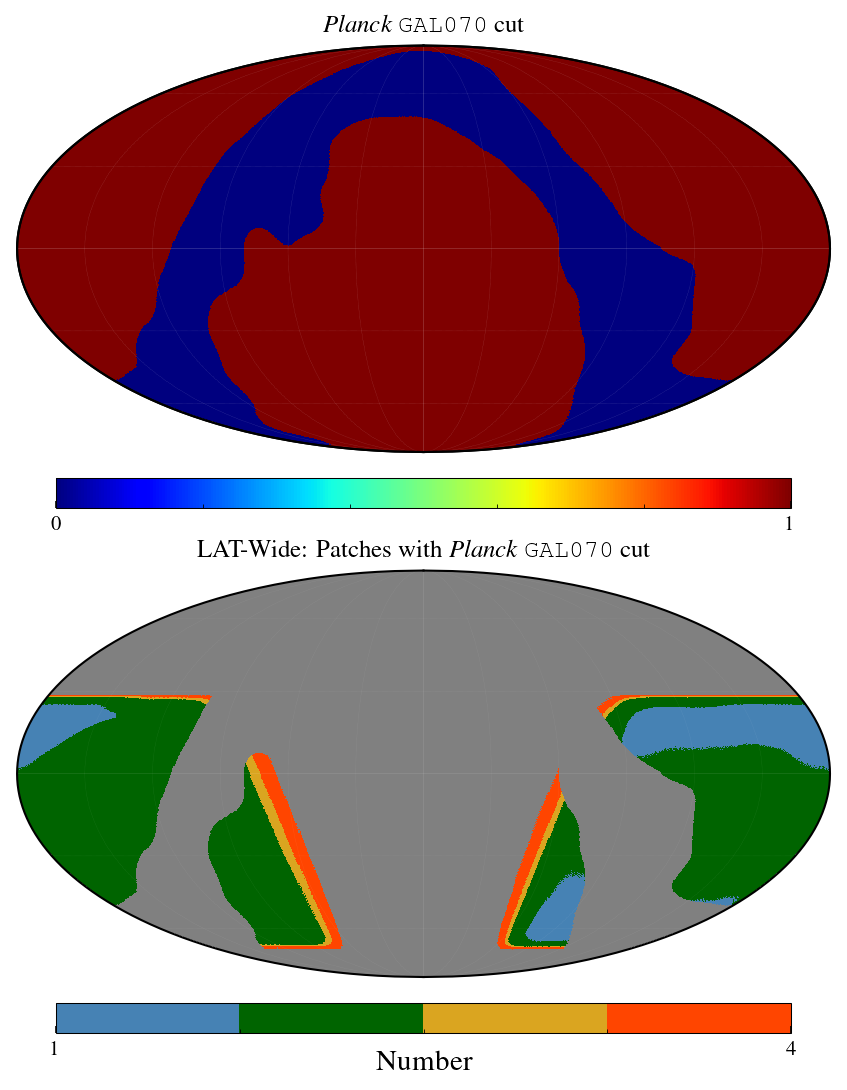

	Apod = 1
		Patch = 1
			fsky = 0.053918 (2224 sq. deg)
		Patch = 2
			fsky = 0.217058 (8954 sq. deg)
		Patch = 3
			fsky = 0.0122569 (505 sq. deg)
		Patch = 4
			fsky = 0.0207677 (856 sq. deg)
	Total fsky = 0.304001 (12540 sq. deg)


<Figure size 900x600 with 0 Axes>

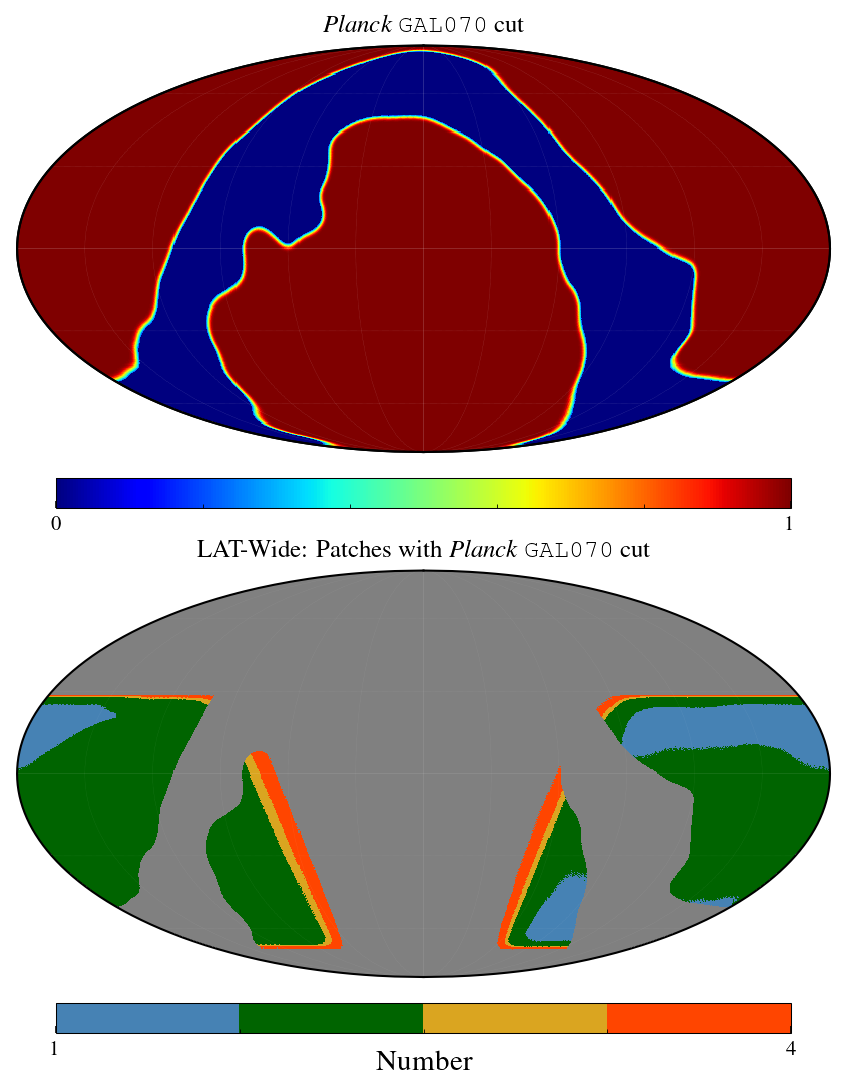


GAL mask = GAL080
	Apod = 0
		Patch = 1
			fsky = 0.0600567 (2477 sq. deg)
		Patch = 2
			fsky = 0.261254 (10777 sq. deg)
		Patch = 3
			fsky = 0.0141455 (583 sq. deg)
		Patch = 4
			fsky = 0.024135 (995 sq. deg)
	Total fsky = 0.359591 (14834 sq. deg)


<Figure size 900x600 with 0 Axes>

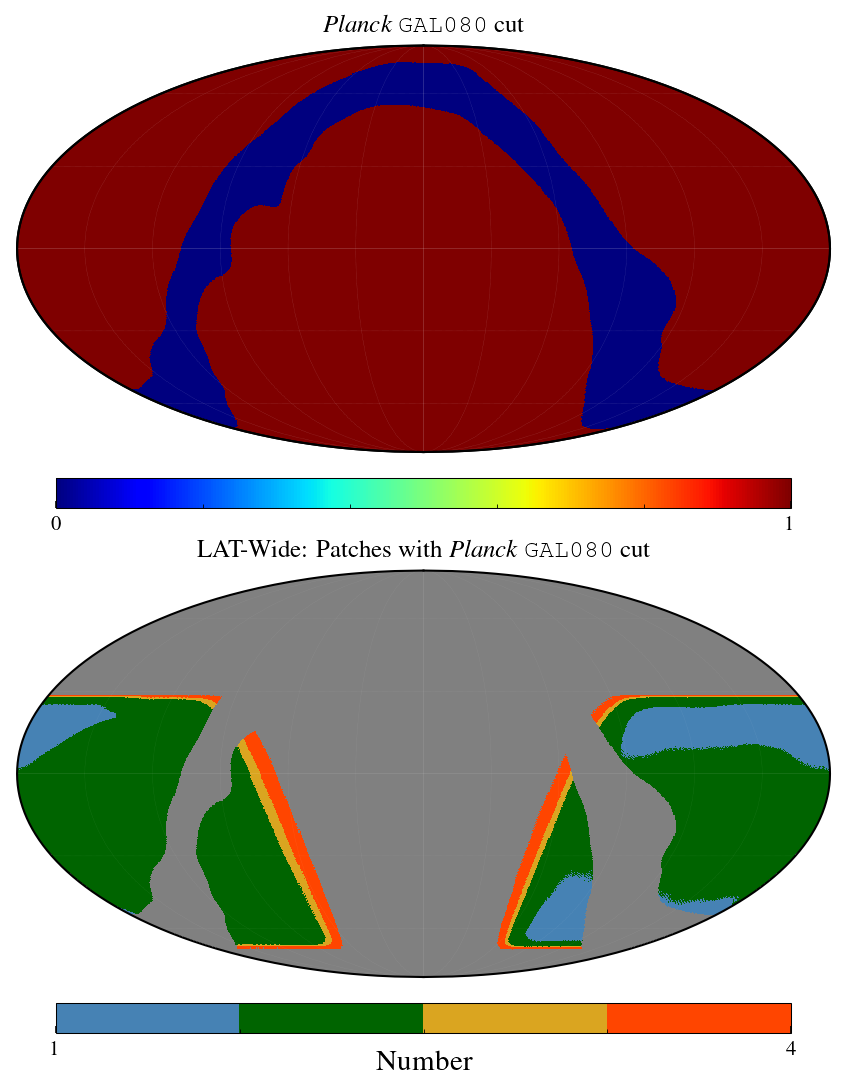

	Apod = 1
		Patch = 1
			fsky = 0.0592472 (2444 sq. deg)
		Patch = 2
			fsky = 0.257352 (10616 sq. deg)
		Patch = 3
			fsky = 0.0139942 (577 sq. deg)
		Patch = 4
			fsky = 0.0238788 (985 sq. deg)
	Total fsky = 0.354473 (14623 sq. deg)


<Figure size 900x600 with 0 Axes>

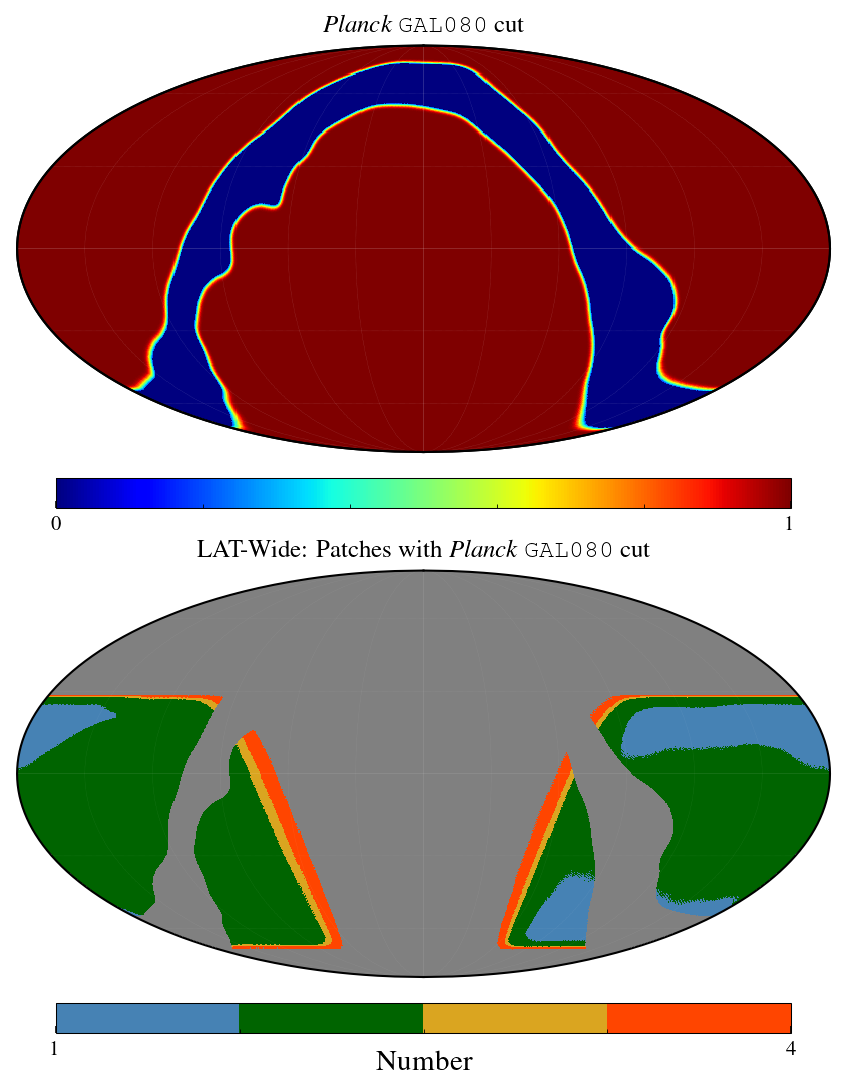


GAL mask = GAL090
	Apod = 0
		Patch = 1
			fsky = 0.0653149 (2694 sq. deg)
		Patch = 2
			fsky = 0.308174 (12713 sq. deg)
		Patch = 3
			fsky = 0.0158822 (655 sq. deg)
		Patch = 4
			fsky = 0.0268192 (1106 sq. deg)
	Total fsky = 0.41619 (17169 sq. deg)


<Figure size 900x600 with 0 Axes>

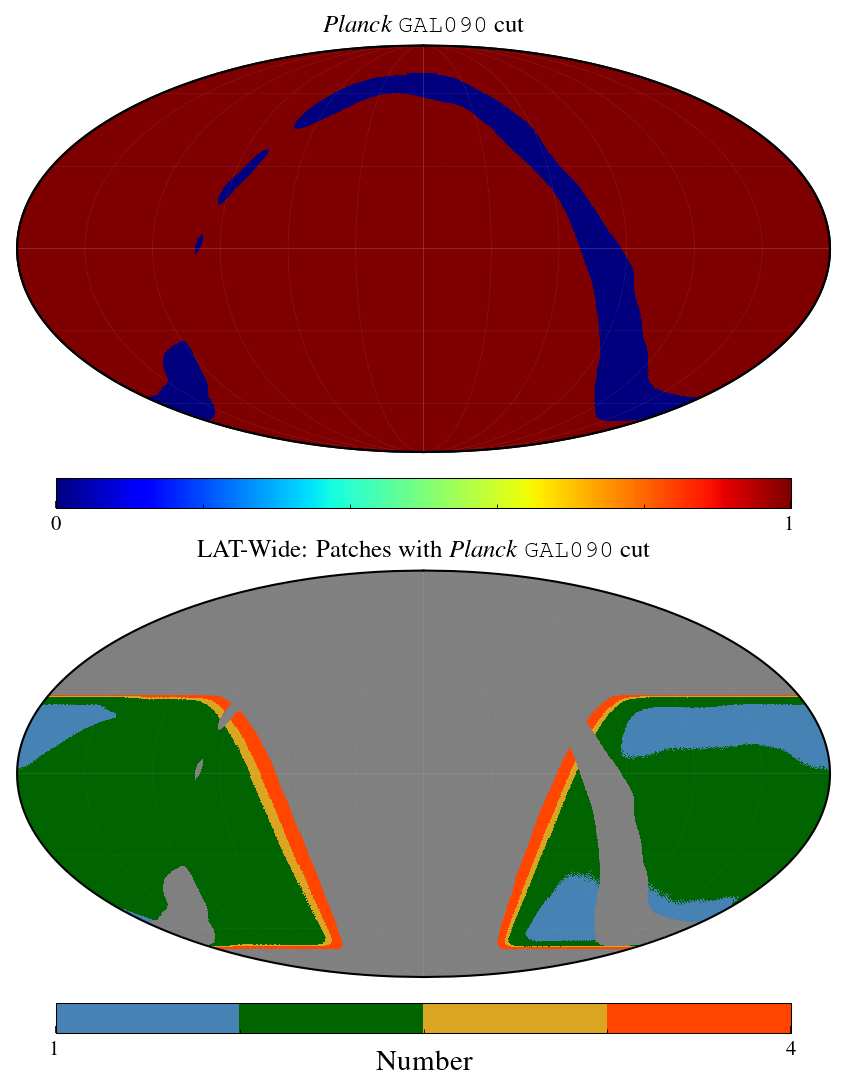

	Apod = 1
		Patch = 1
			fsky = 0.0643962 (2656 sq. deg)
		Patch = 2
			fsky = 0.305329 (12595 sq. deg)
		Patch = 3
			fsky = 0.0156948 (647 sq. deg)
		Patch = 4
			fsky = 0.0265721 (1096 sq. deg)
	Total fsky = 0.411992 (16995 sq. deg)


<Figure size 900x600 with 0 Axes>

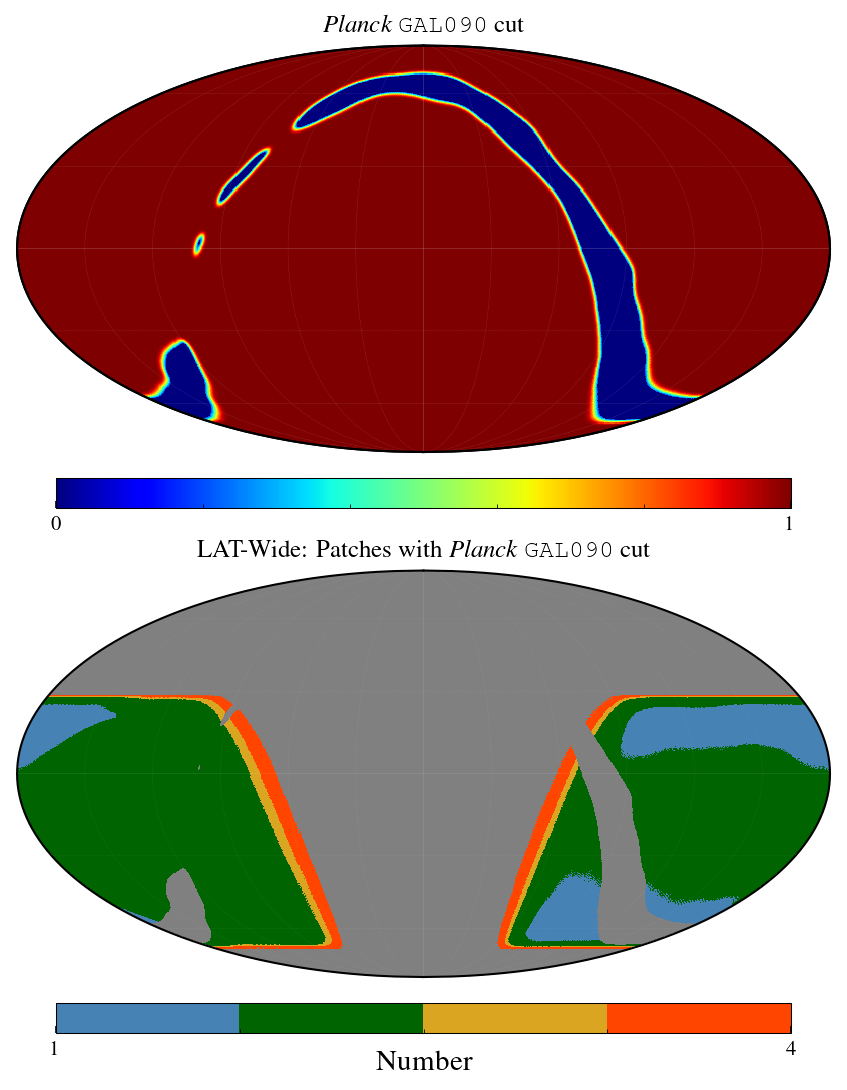

In [32]:
def healpix_rotate_coords(hmap, nside_out, coord, beam_to_use_for_smoothing = 1., threshold = 0.001):
    """
    coord = ['C', 'G'] to convert a map in RADEC to Gal.    
    """

    #degrade
    hmap = H.ud_grade(hmap, 256)
    ##H.mollview(hmap); show(); sys.exit()

    #get map pixel
    pixel = np.arange(len(hmap))

    #get angles in this map first
    nside = H.get_nside(hmap)
    angles = H.pix2ang(nside, pixel)

    #roate the angles to the desired new coordinate
    rotated_angles = H.Rotator(coord=coord)(*angles)

    #get the rotated pixel values
    rotated_pixel = H.ang2pix(nside, *rotated_angles)

    #initialise new map
    rot_hmap = np.zeros(len(pixel))

    #push the original map pixel to the new map (in the rotated pixel positions)
    rot_hmap[rotated_pixel] = hmap[pixel]
    if beam_to_use_for_smoothing is not None:
        rot_hmap = H.smoothing(rot_hmap, fwhm = np.radians(beam_to_use_for_smoothing))
        rot_hmap[rot_hmap>threshold] = 1.
        rot_hmap[rot_hmap<threshold] = 0.

    rot_hmap = H.ud_grade(rot_hmap, nside_out = nside_out)

    return rot_hmap

#planck mask
nside = H.get_nside( baseline_depth_map )
for survey in survey_arr_with_gal_contamination:
    print(survey)
    surveyval, surveylabval = survey_dic[survey]

    for which_gal_frac in which_gal_frac_ind_dic:
        ###if which_gal_frac != 'GAL090': continue
        print('\nGAL mask = %s' %(which_gal_frac))
        which_gal_frac_ind = which_gal_frac_ind_dic[which_gal_frac]

        hmask_planck_ori = H.read_map( planck_gal_mask_fname, field = (which_gal_frac_ind) )
        hmask_planck_ori = H.ud_grade( hmask_planck_ori, nside )
        hmask_planck_ori = healpix_rotate_coords(hmask_planck_ori, nside, coord = ['G', 'C'])
        
        for apod_iter in range(2):
            print('\tApod = %s' %(apod_iter))
            #------------------------------
            #get the Planck mask

            if apod_iter == 0: #no apod
                hmask_planck = np.copy( hmask_planck_ori )
            else:
                hmask_planck = H.smoothing(np.copy( hmask_planck_ori ), fwhm = np.radians(smoothing_beam))
                hmask_planck[hmask_planck<0.2] = 0.
                
            ##H.mollview(hmask_planck); show(); ##sys.exit()

            #------------------------------
            #apply Planck mask to the S4 footprint
            reqd_patch_dic = parent_patch_dic[survey]
            reqd_patch_dic_with_planck_gal_cut = {}
            hmap_patches_with_planck_cut = np.zeros( npix )
            total_sky_area = 41253.
            total_fsky = 0.
            for patch_number in reqd_patch_dic:
                reqd_patch_dic_with_planck_gal_cut[patch_number] = reqd_patch_dic[patch_number] * hmask_planck
                good_inds = np.where( reqd_patch_dic_with_planck_gal_cut[patch_number] > 0 )
                hmap_patches_with_planck_cut[good_inds] = patch_number+1

                curr_fsky = np.mean(reqd_patch_dic_with_planck_gal_cut[patch_number]**2.)
                total_fsky += curr_fsky
                print('\t\tPatch = %s' %(patch_number+1))
                print('\t\t\tfsky = %g (%d sq. deg)' %(curr_fsky, curr_fsky * total_sky_area))
                #print('\tTotal fsky = %g' %(total_fsky))

            ###H.mollview(hmap_patches_with_planck_cut); show(); sys.exit()
            print('\tTotal fsky = %g (%d sq. deg)' %(total_fsky, total_fsky * total_sky_area))

            #------------------------------
            #plotting stuffs below
            clf()
            figure(figsize = (10., 7.))
            subplots_adjust(hspace = 0.2)

            H.mollview(hmask_planck, 
                       cmap = cm.jet, 
                       title = r'{\it Planck} \texttt{%s} cut' %(which_gal_frac), 
                       sub = (211), 
                       cbar = True,
                      )
            H.graticule(lw = 0.2, alpha = 0.2, color = 'white')

            hmap_patches_with_planck_cut[hmap_patches_with_planck_cut ==0.] = H.UNSEEN
            good_inds = np.where( hmap_patches_with_planck_cut != H.UNSEEN)

            cmap_patches = (mpl.colors.ListedColormap(['steelblue', 'darkgreen', 'goldenrod', 'orangered']))
            bounds = np.unique( hmap_patches_with_planck_cut[good_inds] )
            norm = mpl.colors.BoundaryNorm(bounds, cmap_patches.N)
            H.mollview(hmap_patches_with_planck_cut, 
                       cmap = cmap_patches, 
                       title = r'%s: Patches with {\it Planck} \texttt{%s} cut' %(surveylabval, which_gal_frac), 
                       min = min(hmap_patches_with_planck_cut[good_inds]), max = max(hmap_patches_with_planck_cut[good_inds]),
                       sub = (212), 
                       unit = r'Number',
                      )
            H.graticule(lw = 0.2, alpha = 0.2, color = 'white')
            show(); ##sys.exit() 

            #------------------------------
        
    